**Importing Libraries**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , recall_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
df = pd.read_csv("/content/spam_or_not_spam.csv")
df.head()
#1 - spam , 0 - not spam

,email,label
0,Win money now! Click here to claim your prize.,1
1,Meeting rescheduled to tomorrow at 10 AM.,0
2,Congratulations! You have been selected for a ...,1
3,Project update: the latest draft is ready for ...,0
4,"Lowest prices on meds, no prescription required!",1


**Analysing the data**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   150 non-null    object
 1   label   150 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [115]:
df.describe()

,label
count,150.000000
mean,0.500000
std,0.501675
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [116]:
df.isnull().sum()

,0
email,0
label,0


In [117]:
x = df['email']
y = df['label']

train test split


In [118]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

*Using count vectorizer to vectorize the dataset*

In [119]:
#count vectorizer

vectorizer = CountVectorizer(stop_words='english')
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorizer = vectorizer.transform(x_test)

In [120]:
model = LogisticRegression()
model.fit(x_train_vectorized,y_train)

LogisticRegression()

In [121]:
y_pred = model.predict(x_test_vectorizer)

In [122]:
accuracy = accuracy_score(y_test,y_pred)
# precision = precision_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy : " , accuracy,"\n")
print("Classification Report : ")
print(classification_rep)
print("Confusion Matrix : " , confusion_mat)

Accuracy :  0.8 

Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.87      0.76      0.81        17

    accuracy                           0.80        30
   macro avg       0.80      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

Confusion Matrix :  [[11  2]
 [ 4 13]]


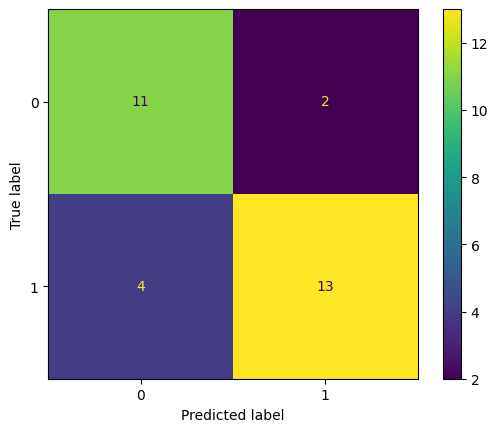

In [123]:
from sklearn.metrics import  ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [124]:
#sample predicion

inp = input("Enter the text : ")
input_vectorized = vectorizer.transform([inp])
prediction = model.predict(input_vectorized)
print("spam" if prediction == 1 else "not spam")

Enter the text : you got 75000 rupees prize enter your credidentials to grab the prize
spam


**Vectorizer Using tf-idf vectorizer , then Predicting**

In [125]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [126]:
model_tfidf = LogisticRegression(max_iter=2000)
model_tfidf.fit(x_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(x_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

Accuracy: 0.8


In [127]:
accuracy = accuracy_score(y_test,y_pred_tfidf)
# precision = precision_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred_tfidf)
confusion_mat = confusion_matrix(y_test,y_pred_tfidf)

print("Accuracy : " , accuracy,"\n")
print("Classification Report : ")
print(classification_rep)
print("Confusion Matrix : " , confusion_mat)

Accuracy :  0.8 

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.79      0.88      0.83        17

    accuracy                           0.80        30
   macro avg       0.80      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30

Confusion Matrix :  [[ 9  4]
 [ 2 15]]


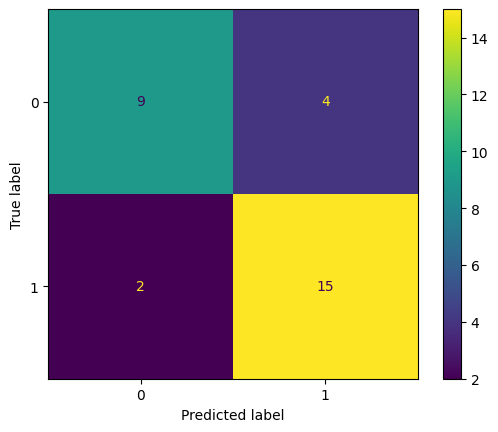

In [128]:
from sklearn.metrics import  ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tfidf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()